## Preprocessing for numerical features![api_diagram-transformer.fit.svg](![lstm.png](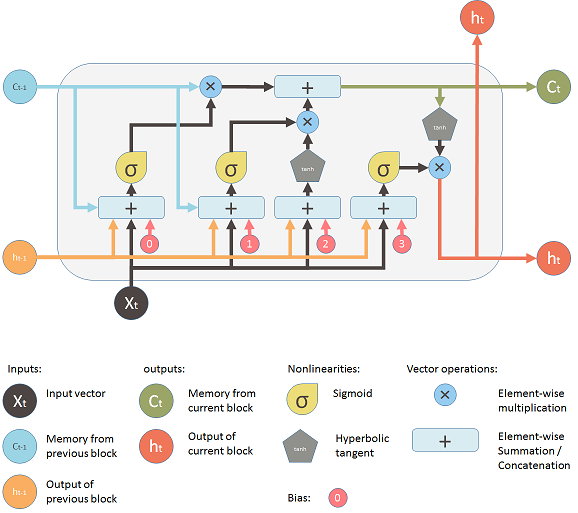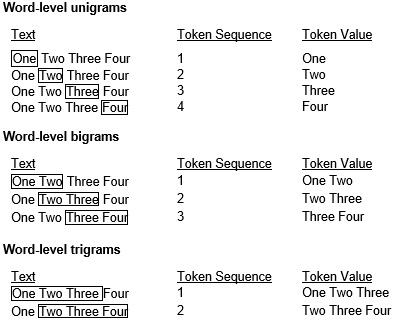))

n this notebook, we still use numerical features only.

Here we introduce these new aspects:

    an example of preprocessing, namely scaling numerical variables;
    using a scikit-learn pipeline to chain preprocessing and model training.


### Data preparation

In [ ]:
# First, let's load the full adult census dataset.

import pandas as pd

adult_census = pd.read_csv("/content/drive/MyDrive/DataSets/Adult_Census/adult-census(1).csv")

In [ ]:
# We now drop the target from the data we use to train our predictive model.

target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [ ]:
# Then, we select only the numerical columns, as seen in the previous notebook.

numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [ ]:
# Finally, we can divide our dataset into a train and test sets.

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numeric, target, random_state=42)

## Model fitting with preprocessing

A range of preprocessing algorithms in scikit-learn allow us to transform the input data before training a model. In our case, we will standardize the data and then train a new logistic regression model on that new version of the dataset.

Let's start by printing some statistics about the training data.

In [ ]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


We see that the dataset's features span across different ranges. Some algorithms make some assumptions regarding the feature distributions and normalizing features is usually helpful to address such assumptions.

Tip

Here are some reasons for scaling features:

    Models that rely on the distance between a pair of samples, for instance k-nearest neighbors, should be trained on normalized features to make each feature contribute approximately equally to the distance computations.
    Many models such as logistic regression use a numerical solver (based on gradient descent) to find their optimal parameters. This solver converges faster when the features are scaled.

Whether or not a machine learning model requires scaling the features depends on the model family. Linear models such as logistic regression generally benefit from scaling the features while other models such as decision trees do not need such preprocessing (but would not suffer from it).

We show how to apply such normalization using a scikit-learn transformer called StandardScaler. This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

We now investigate different steps used in scikit-learn to achieve such a transformation of the data.

First, one needs to call the method fit in order to learn the scaling from the data.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

The fit method for transformers is similar to the fit method for predictors. The main difference is that the former has a single argument (the data matrix), whereas the latter has two arguments (the data matrix and the target).


In this case, the algorithm needs to compute the mean and standard deviation for each feature and store them into some NumPy arrays. Here, these statistics are the model states.

Note

The fact that the model states of this scaler are arrays of means and standard deviations is specific to the StandardScaler. Other scikit-learn transformers may compute different statistics and store them as model states, in a similar fashion.

We can inspect the computed means and standard deviations.


In [ ]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [ ]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])



Note

scikit-learn convention: if an attribute is learned from the data, its name ends with an underscore (i.e. _), as in mean_ and scale_ for the StandardScaler.

Scaling the data is applied to each feature individually (i.e. each column in the data matrix). For each feature, we subtract its mean and divide by its standard deviation.

Once we have called the fit method, we can perform data transformation by calling the method transform.


In [ ]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

Let's illustrate the internal mechanism of the transform method and put it to perspective with what we already saw with predictors.


The transform method for transformers is similar to the predict method for predictors. It uses a predefined function, called a transformation function, and uses the model states and the input data. However, instead of outputting predictions, the job of the transform method is to output a transformed version of the input data.

Finally, the method fit_transform is a shorthand method to call successively fit and then transform.


In scikit-learn jargon, a transformer is defined as an estimator (an object with a fit method) supporting transform or fit_transform.


In [ ]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

By default, all scikit-learn transformers output NumPy arrays. Since scikit-learn 1.2, it is possible to set the output to be a pandas dataframe, which makes data exploration easier as it preserves the column names. The method set_output controls this behaviour.

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


Notice that the mean of all the columns is close to 0 and the standard deviation in all cases is close to 1. We can also visualize the effect of StandardScaler using a jointplot to show both the histograms of the distributions and a scatterplot of any pair of numerical features at the same time. We can observe that StandardScaler does not change the structure of the data itself but the axes get shifted and scaled.

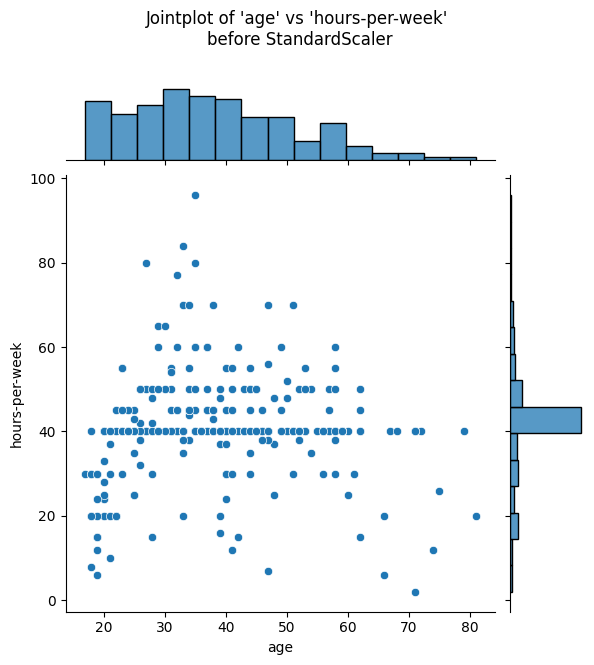

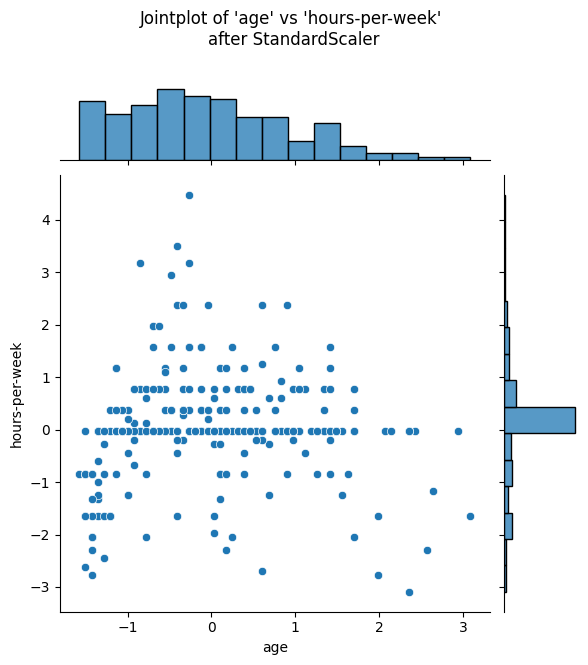

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(
    data=data_train[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15),
)
plt.suptitle(
    "Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1
)

sns.jointplot(
    data=data_train_scaled[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15),
)
_ = plt.suptitle(
    "Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1
)

We can easily combine sequential operations with a scikit-learn Pipeline, which chains together operations and is used as any other classifier or regressor. The helper function make_pipeline creates a Pipeline: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

The make_pipeline function did not require us to give a name to each step. Indeed, it was automatically assigned based on the name of the classes provided; a StandardScaler step is named "standardscaler" in the resulting pipeline. We can check the name of each steps of our model:

In [ ]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor: fit and predict (and additionally predict_proba, decision_function, or score).

In [ ]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

When calling model.fit, the method fit_transform from each underlying transformer (here a single transformer) in the pipeline is called to:

    learn their internal model states
    transform the training data. Finally, the preprocessed data are provided to train the predictor.

To predict the targets given a test set, one uses the predict method.

In [ ]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

The method transform of each transformer (here a single transformer) is called to preprocess the data. Note that there is no need to call the fit method for these transformers because we are using the internal model states computed when calling model.fit. The preprocessed data is then provided to the predictor that outputs the predicted target by calling its method predict.

As a shorthand, we can check the score of the full predictive pipeline calling the method model.score. Thus, let's check the computational and generalization performance of such a predictive pipeline.

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

The accuracy using a Pipeline is 0.807 with a fitting time of 0.222 seconds in 12 iterations


In [ ]:
# We could compare this predictive model with the predictive model used in the previous notebook which did not scale features.
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model.n_iter_[0]} iterations"
)

The accuracy using a LogisticRegression is 0.807 with a fitting time of 0.613 seconds in 59 iterations


We see that scaling the data before training the logistic regression was beneficial in terms of computational performance. Indeed, the number of iterations decreased as well as the training time. The generalization performance did not change since both models converged.

Warning

Working with non-scaled data will potentially force the algorithm to iterate more as we showed in the example above. There is also the catastrophic scenario where the number of required iterations is larger than the maximum number of iterations allowed by the predictor (controlled by the max_iter) parameter. Therefore, before increasing max_iter, make sure that the data are well scaled.
